In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt


In [101]:
# load dataset
dataframe = pandas.read_csv("data/records_third.csv", header=0)



In [31]:
dataframe.head()

,name,gh_version,pypi_version,status,diffoscope,repo_version,error
0,static-ffmpeg,Failed,Failed,Failed,Error,NaN,NaN
1,mccabe,Failed,Failed,Failed,Error,NaN,NaN
2,pytest-mongodb,Failed,Failed,Failed,Error,NaN,NaN
3,mypy-boto3-xray,Failed,Failed,Failed,Error,NaN,NaN
4,pyphaxio,0.11,0.11,Success,├── file list README.rst setup.cfg tests,NaN,NaN


In [32]:
dataframe.describe()

,repo_version,error
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [33]:
dataframe['status'].value_counts()

Failed     65
Success    35
Name: status, dtype: int64

<AxesSubplot: >

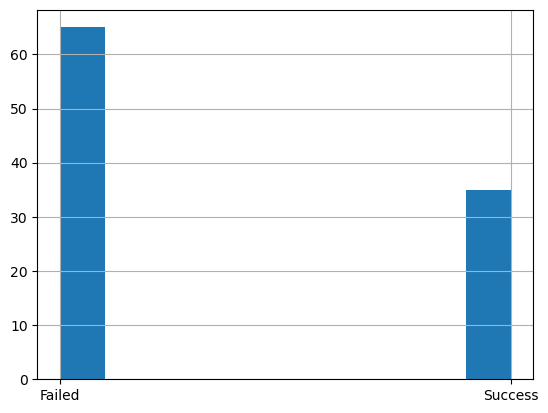

In [34]:
dataframe['status'].hist()

In [37]:
# Check which records have "status" of Success and check "diffoscope" column for ones that have only "├── file list"

dataframe.loc[dataframe['status'] == 'Success'].head(35)


,name,gh_version,pypi_version,status,diffoscope,repo_version,error
4,pyphaxio,0.11,0.11,Success,├── file list README.rst setup.cfg tests,NaN,NaN
7,xblock-utils,.2,3.2.0,Success,├── file list MANIFEST.in requirements setup.c...,NaN,NaN
9,pyportfolioopt,1.5.5,1.5.5,Success,├── file list setup.py,NaN,NaN
12,pure-python-adb,0.3.0,0.3.0.0,Success,├── file list ppadb,NaN,NaN
16,google-ads,21.2.0,21.2.0,Success,├── file list,NaN,NaN
22,attrdict,2.0.1,2.0.1,Success,├── file list setup.cfg,NaN,NaN
26,arnparse,0.0.2,0.0.2,Success,├── file list setup.cfg,NaN,NaN
34,wsgicors,0.7.0,0.7.0,Success,├── file list README.rst setup.cfg,NaN,NaN
35,rejected,3.22.0,3.22.0,Success,├── file list requires setup.cfg,NaN,NaN
38,naas-drivers,0.110.0,0.109.1,Success,├── file list README.md naas_drivers setup.cfg...,NaN,NaN


3


<BarContainer object of 3 artists>

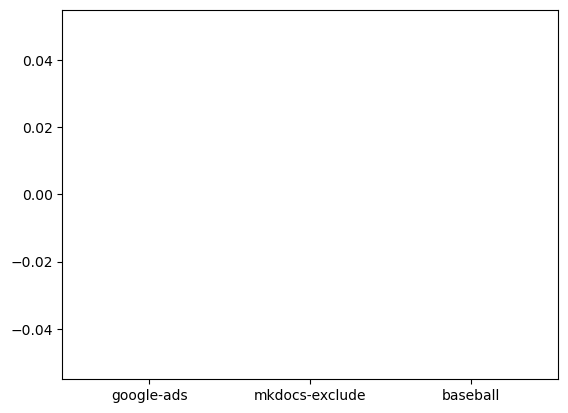

In [141]:

dfr = dataframe.loc[dataframe['status'] == 'Success']
dfr = dfr.loc[dfr['diffoscope'] == '├── file list']
# len
print(len(dfr))
dfr.head()

# Graph Success packages. name vs gh_version (is a string) chart with the version at the side
plt.bar(dfr['name'], 0)





32


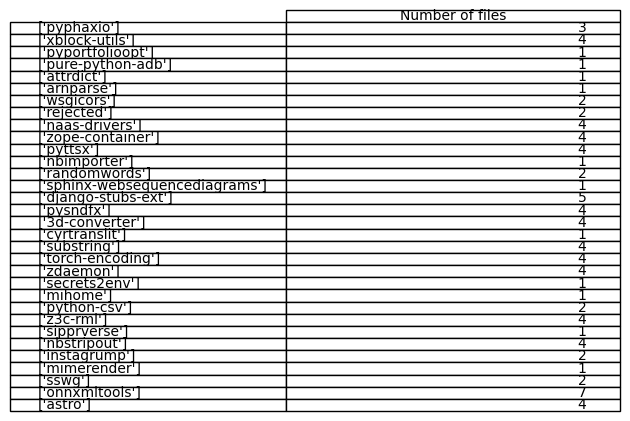

In [151]:

dfr = dataframe.loc[dataframe['status'] == 'Success']
dfr = dfr.loc[dfr['diffoscope'] != '├── file list']

# make diffoscope column a list by spliting after "├── file list"
dfr['diffoscope'] = dfr['diffoscope'].str.split('├── file list ')

# dfr = dfr.loc[len(list(dfr['diffoscope'])) > 1]

dfr['diffoscope'] = dfr['diffoscope'].apply(lambda x: x[1:])
dfr['diffoscope'] = dfr['diffoscope'].apply(lambda x: list(x)[0].split())

# dfr = dfr.loc[dfr['diffoscope'].apply(lambda x: len(x) < 2)]

dfr['count'] = dfr['diffoscope'].apply(lambda x: len(x))


print(len(dfr))

# Plot the number of packages that have a diffoscope output that is not just "├── file list" table
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


ax.table(cellText=dfr['count'].values.reshape(-1, 1), colLabels=['Number of files'], rowLabels=dfr['name'].values.reshape(-1, 1), loc='center')

fig.tight_layout()

plt.show()


65
27
10
16
12


<BarContainer object of 4 artists>

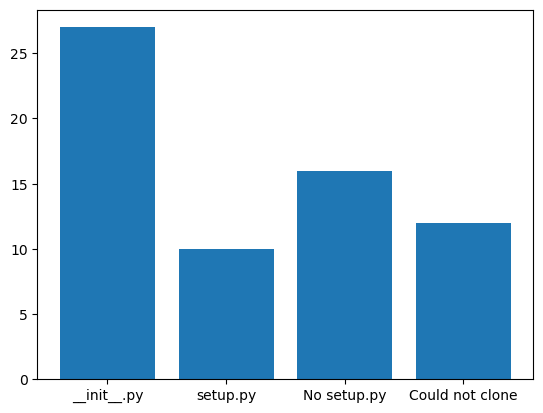

In [138]:
dfra = dataframe.loc[dataframe['status'] == 'Failed']

print(len(dfra))
# Check for errors involving __init__.py and setup.py not found
dfra = dfra['error'].apply(lambda x: str(x))


# dfr = dfra.loc[dfra['error'] in 'No version found after checking __init__.py']

dfra1 = dfra.loc[dfra.str.contains('No version found after checking __init__.py')]
dfra2 = dfra.loc[dfra.str.contains('No version found in setup.py')]
dfra4 = dfra.loc[dfra.str.contains('No setup.py found')]
dfra3 = dfra.loc[dfra.str.contains('Could not clone the repo')]
# dfra4 = dfra.loc[dfra == "NA"]

print(len(dfra1))
print(len(dfra2))
print(len(dfra3))
print(len(dfra4))


# Graph the length of dfra1, dfra2, dfra3, dfra4
plt.bar(['__init__.py', 'setup.py', 'No setup.py', 'Could not clone'], [len(dfra1), len(dfra2), len(dfra3), len(dfra4)])